<a href="https://colab.research.google.com/github/adarsh-meher/Programming-in-PyTorch-/blob/master/Introductory_Codes_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.nn import functional as fn

## ***Examples on using basic pytorch for a regression problem***

In [0]:
#### Create a NxM array with random values
N  = 1000
M = 5
x = torch.randn(N,M)
print(x.size())

torch.Size([1000, 5])


In [0]:
#### Create the target variable as a linear combination of X and add noise.
wts = torch.distributions.uniform.Uniform(0,1).sample_n(M)
wts_std = wts/torch.sum(wts)
y = torch.matmul(x,wts_std) + torch.randn(x.size()[0])
y.size()

/usr/local/lib/python3.6/dist-packages/torch/distributions/distribution.py:134: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


torch.Size([1000])

In [0]:
epochs = 1000
lear_rate = 0.01

In [0]:
class NNET(torch.nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(NNET,self).__init__()
    self.hidden = torch.nn.Linear(input_size,hidden_size)
    self.output = torch.nn.Linear(hidden_size,output_size)

  def forward(self,input):
    hidden_layer = fn.relu(self.hidden(input))
    output_layer = self.output(hidden_layer)
    return output_layer
  

In [0]:
net = NNET(M,15,1)

In [0]:
print(net)

NNET(
  (hidden): Linear(in_features=5, out_features=15, bias=True)
  (output): Linear(in_features=15, out_features=1, bias=True)
)


In [0]:
#### Defining explicitly loss,gradient and backprop calculation 

loss_func = torch.nn.MSELoss()
for i in range(epochs):
  output = net(x)
  loss = loss_func(output,y)
  net.zero_grad()
  loss.backward()

  for f in net.parameters():
    #print('The data is : %s' % (f.data))
    #print('The gradient is : %s' % (f.grad.data))
    f.data.sub_(lear_rate*f.grad.data)
  
  print(str(i) + 'th loss : %s' % (loss.squeeze()))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0th loss : tensor(1.3866, grad_fn=<SqueezeBackward0>)
1th loss : tensor(1.3861, grad_fn=<SqueezeBackward0>)
2th loss : tensor(1.3856, grad_fn=<SqueezeBackward0>)
3th loss : tensor(1.3851, grad_fn=<SqueezeBackward0>)
4th loss : tensor(1.3847, grad_fn=<SqueezeBackward0>)
5th loss : tensor(1.3843, grad_fn=<SqueezeBackward0>)
6th loss : tensor(1.3839, grad_fn=<SqueezeBackward0>)
7th loss : tensor(1.3835, grad_fn=<SqueezeBackward0>)
8th loss : tensor(1.3832, grad_fn=<SqueezeBackward0>)
9th loss : tensor(1.3828, grad_fn=<SqueezeBackward0>)
10th loss : tensor(1.3825, grad_fn=<SqueezeBackward0>)
11th loss : tensor(1.3822, grad_fn=<SqueezeBackward0>)
12th loss : tensor(1.3819, grad_fn=<SqueezeBackward0>)
13th loss : tensor(1.3816, grad_fn=<SqueezeBackward0>)
14th loss : tensor(1.3813, grad_fn=<SqueezeBackward0>)
15th loss : tensor(1.3811, grad_fn=<SqueezeBackward0>)
16th loss : tensor(1.3808, grad_fn=<SqueezeBackward0>)
17th loss : tensor(1.3805, grad_fn=<SqueezeBackward0>)
18th loss : tensor(1

In [0]:
#### Using torch.nn to sequentially define network architecture

hidden_units = 15
output_units = 1
seq_net = torch.nn.Sequential(torch.nn.Linear(M,hidden_units),torch.nn.ReLU(),
                              torch.nn.Linear(hidden_units,output_units))

print(seq_net)

Sequential(
  (0): Linear(in_features=5, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
)


In [0]:
optim = torch.optim.SGD(seq_net.parameters(),lr = 0.01,momentum = 0.5,nesterov = True)

In [0]:
for i in range(epochs):
  output = seq_net(x)
  loss = loss_func(output,y)
  optim.zero_grad()
  loss.backward()
  optim.step()
  if (i+1) % 5 == 0:
    print(str(i+1)+'th loss : %s' % (loss.squeeze()))

5th loss : tensor(1.3896, grad_fn=<SqueezeBackward0>)
10th loss : tensor(1.3841, grad_fn=<SqueezeBackward0>)
15th loss : tensor(1.3806, grad_fn=<SqueezeBackward0>)
20th loss : tensor(1.3781, grad_fn=<SqueezeBackward0>)
25th loss : tensor(1.3761, grad_fn=<SqueezeBackward0>)
30th loss : tensor(1.3745, grad_fn=<SqueezeBackward0>)
35th loss : tensor(1.3731, grad_fn=<SqueezeBackward0>)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


40th loss : tensor(1.3720, grad_fn=<SqueezeBackward0>)
45th loss : tensor(1.3710, grad_fn=<SqueezeBackward0>)
50th loss : tensor(1.3701, grad_fn=<SqueezeBackward0>)
55th loss : tensor(1.3694, grad_fn=<SqueezeBackward0>)
60th loss : tensor(1.3687, grad_fn=<SqueezeBackward0>)
65th loss : tensor(1.3682, grad_fn=<SqueezeBackward0>)
70th loss : tensor(1.3677, grad_fn=<SqueezeBackward0>)
75th loss : tensor(1.3673, grad_fn=<SqueezeBackward0>)
80th loss : tensor(1.3669, grad_fn=<SqueezeBackward0>)
85th loss : tensor(1.3666, grad_fn=<SqueezeBackward0>)
90th loss : tensor(1.3663, grad_fn=<SqueezeBackward0>)
95th loss : tensor(1.3661, grad_fn=<SqueezeBackward0>)
100th loss : tensor(1.3659, grad_fn=<SqueezeBackward0>)
105th loss : tensor(1.3657, grad_fn=<SqueezeBackward0>)
110th loss : tensor(1.3655, grad_fn=<SqueezeBackward0>)
115th loss : tensor(1.3654, grad_fn=<SqueezeBackward0>)
120th loss : tensor(1.3653, grad_fn=<SqueezeBackward0>)
125th loss : tensor(1.3651, grad_fn=<SqueezeBackward0>)
130t

# **Using basic pytorch for classification problem on sklearn dataset**

In [0]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import pandas as pd
data,target = fetch_olivetti_faces().data,fetch_olivetti_faces().target
data1 = pd.concat([pd.DataFrame(data),pd.Series(target)],axis = 1,ignore_index = True)
data2 = pd.DataFrame(data1).sample(frac = 1.0)
target_col = data2.columns.tolist()[-1]
data2.index = range(data2.shape[0])
data,target = data2.drop([target_col],axis = 1),data2[target_col]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [0]:
data.shape

(400, 4096)

In [0]:
data_ten = torch.from_numpy(data.values)
target_ten = torch.from_numpy(target.values)

In [0]:
input_size = data_ten.size()[1]
output_size = len(np.unique(target))

In [0]:
num_hidden = int(input_size/2)
seq_net_1 = torch.nn.Sequential(torch.nn.Linear(input_size,num_hidden),torch.nn.ReLU(),torch.nn.Linear(num_hidden,output_size),torch.nn.Sigmoid())

In [0]:
seq_net_1

Sequential(
  (0): Linear(in_features=4096, out_features=2048, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2048, out_features=40, bias=True)
  (3): Sigmoid()
)

In [0]:
optim = torch.optim.SGD(seq_net_1.parameters(),lr = 0.01,momentum = 0.9,nesterov=True)
loss_func = torch.nn.CrossEntropyLoss()
for i in range(epochs):
  output = seq_net_1(data_ten)
  t1 = torch.from_numpy(np.array([ int(x.argmax()) for x in output ]))
  output_loss = loss_func(output,target_ten)
  optim.zero_grad()
  output_loss.backward()
  optim.step()

  if ((i+1)%4) == 0:
    print(str(i+1)+'th loss : %s' % (output_loss.squeeze()))

4th loss : tensor(3.6625, grad_fn=<SqueezeBackward0>)
8th loss : tensor(3.6599, grad_fn=<SqueezeBackward0>)
12th loss : tensor(3.6565, grad_fn=<SqueezeBackward0>)
16th loss : tensor(3.6526, grad_fn=<SqueezeBackward0>)
20th loss : tensor(3.6484, grad_fn=<SqueezeBackward0>)
24th loss : tensor(3.6440, grad_fn=<SqueezeBackward0>)
28th loss : tensor(3.6393, grad_fn=<SqueezeBackward0>)
32th loss : tensor(3.6345, grad_fn=<SqueezeBackward0>)
36th loss : tensor(3.6296, grad_fn=<SqueezeBackward0>)
40th loss : tensor(3.6245, grad_fn=<SqueezeBackward0>)
44th loss : tensor(3.6192, grad_fn=<SqueezeBackward0>)
48th loss : tensor(3.6138, grad_fn=<SqueezeBackward0>)
52th loss : tensor(3.6083, grad_fn=<SqueezeBackward0>)
56th loss : tensor(3.6026, grad_fn=<SqueezeBackward0>)
60th loss : tensor(3.5968, grad_fn=<SqueezeBackward0>)
64th loss : tensor(3.5908, grad_fn=<SqueezeBackward0>)
68th loss : tensor(3.5847, grad_fn=<SqueezeBackward0>)
72th loss : tensor(3.5784, grad_fn=<SqueezeBackward0>)
76th loss : 

# ***Working with TorchVision***

In [0]:
import pdb
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os

In [0]:
transform = transforms.Compose([
transforms.RandomHorizontalFlip(p = 0.7),
transforms.RandomVerticalFlip(p = 0.6),
transforms.ToTensor(),
transforms.Normalize(mean = (0.5,0.2,0.6),std = (0.1,0.1,0.1))                                
])

In [0]:
train = torchvision.datasets.CIFAR10(os.path.join(os.getcwd(),'CIFAR_data'),download = True,transform = transforms,train = True)
trainset = torch.utils.data.DataLoader(train,batch_size = 32,shuffle = True)

Files already downloaded and verified


In [0]:
test = torchvision.datasets.CIFAR10(os.path.join(os.getcwd(),'CIFAR_data'),download = True,transform = transforms,train = False)
testset = torch.utils.data.DataLoader(test,batch_size = 32,shuffle = True)

Files already downloaded and verified


In [0]:
classes = tuple(trainset.dataset.classes)

In [0]:
'''
##### View random batch
iterable_batch = iter(trainset)
random_batch,labels = iterable_batch.next()
grid = torchvision.utils.make_grid(random_batch)
grid_matrix = grid.numpy()
plt.imshow(grid_matrix.transpose(1,2,0))
'''

'\n##### View random batch\niterable_batch = iter(trainset)\nrandom_batch,labels = iterable_batch.next()\ngrid = torchvision.utils.make_grid(random_batch)\ngrid_matrix = grid.numpy()\nplt.imshow(grid_matrix.transpose(1,2,0))\n'

In [0]:
class ConvNet(torch.nn.Module):
  def __init__(self):
    super(ConvNet,self).__init__()
    self.convol1 = torch.nn.Conv2d(in_channels=3,out_channels=30,kernel_size = 5)
    self.pool1 = torch.nn.MaxPool2d(2,2)
    self.convol2 = torch.nn.Conv2d(30,30,5)
    self.fc1 = torch.nn.Linear(in_features=30*5*5,300)
    self.fc2 = torch.nn.Linear(300,100)
    self.fc3 = torch.nn.Linear(100,10)
  
  def Forward(self,x):
    x1 = self.pool(F.relu(self.convol1(x)))
    x2 = self.pool(F.relu(self.convol2(x)))
    x3 = x2.view(-1,30*5*5)
    x3 = F.relu(self.fc1(x3))
    x3 = F.relu(self.fc2(x3))
    x3 = self.fc3(x3)

    return x3

  

# **Deep Learning with Torch**


In [0]:
import torch

In [2]:
torch.get_default_dtype()

torch.float32

In [0]:
torch.set_default_dtype(torch.float64)

In [4]:
torch_arr = torch.Tensor([[1,2,3],[4,5,6]])
print(torch_arr)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [5]:
torch.is_tensor(torch_arr)

True

In [6]:
torch.numel(torch_arr)

6

In [7]:
torch.Tensor(2,3)

tensor([[3.5697e-316, 2.9644e-323, 4.9407e-324],
        [8.5051e+223,  1.1016e-94, 3.5176e+180]])

In [8]:
torch_int_arr = torch.Tensor([5,4,3,2]).type(torch.IntTensor)
print(torch_int_arr)

tensor([5, 4, 3, 2], dtype=torch.int32)


In [9]:
tensor_fill = torch.full(size = (3,3),fill_value = 20)
print(tensor_fill)

tensor([[20., 20., 20.],
        [20., 20., 20.],
        [20., 20., 20.]])


In [10]:
iden_tensor = torch.eye(2,3)
print(iden_tensor)

tensor([[1., 0., 0.],
        [0., 1., 0.]])


In [11]:
one_tensor = torch.ones(size = (4,4))
zero_tensor = torch.zeros_like(one_tensor)
print(one_tensor)
print(zero_tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [0]:
i = torch.tensor([[1,2,3],[4,5,6]])
v = torch.tensor([2,3,4],dtype  =torch.float32)

In [0]:
sparse_tensor = torch.sparse_coo_tensor(i,v,size = (4,7))

In [14]:
print(sparse_tensor)

tensor(indices=tensor([[1, 2, 3],
                       [4, 5, 6]]),
       values=tensor([2., 3., 4.]),
       size=(4, 7), nnz=3, dtype=torch.float32, layout=torch.sparse_coo)


In [0]:
tensor1 = torch.rand(3,3)

In [16]:
tensor1.fill_(3)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [17]:
tensor1.data

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [18]:
tensor1.add_(5)

tensor([[8., 8., 8.],
        [8., 8., 8.],
        [8., 8., 8.]])

In [0]:
tensor2 = tensor1.sqrt_()

In [20]:
tensor2 = torch.linspace(start=2,end = 13,steps = 15)
print(tensor2)

tensor([ 2.0000,  2.7857,  3.5714,  4.3571,  5.1429,  5.9286,  6.7143,  7.5000,
         8.2857,  9.0714,  9.8571, 10.6429, 11.4286, 12.2143, 13.0000])


In [0]:
tensor3 = torch.chunk(tensor2,5,0)

In [0]:
tensor4 = torch.rand(3,3)

In [23]:
tensor4.unsqueeze(0)

tensor([[[0.2942, 0.8121, 0.2241],
         [0.9438, 0.4242, 0.8763],
         [0.4038, 0.2748, 0.6097]]])

In [24]:
tensor4.unsqueeze(2).transpose(1,0).shape

torch.Size([3, 3, 1])

In [25]:
tensor4.sort()

torch.return_types.sort(values=tensor([[0.2241, 0.2942, 0.8121],
        [0.4242, 0.8763, 0.9438],
        [0.2748, 0.4038, 0.6097]]), indices=tensor([[2, 0, 1],
        [1, 2, 0],
        [1, 0, 2]]))

In [0]:
tensor4 = torch.tensor([2,4,5,7,8])

In [0]:
mat1 = torch.randn((3,3))
mat2 = torch.randn((3,2))
vec1 = torch.rand(3)

In [28]:
torch.mv(mat2.transpose(0,1),vec1)

tensor([0.1852, 1.6747])

In [29]:
mat1.requires_grad_()

tensor([[-1.9332, -0.7946,  0.5025],
        [ 0.6416,  1.5839, -0.0480],
        [ 0.4325,  1.3826,  0.7796]], requires_grad=True)

In [88]:
mat1.requires_grad

True

In [89]:
mat4 = torch.mv(mat1,vec1)
print(mat4)

tensor([-1.3155,  0.9196,  1.3474], grad_fn=<MvBackward>)


In [36]:
import numpy as np
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
X_train = torch.empty(size = (1000,12)).normal_(mean = 10.,std = 25.)
wts = torch.randn(12)
bias = torch.full(size=  (1000,),fill_value = 2.5)
Y_train = torch.mv(X_train,wts) + bias

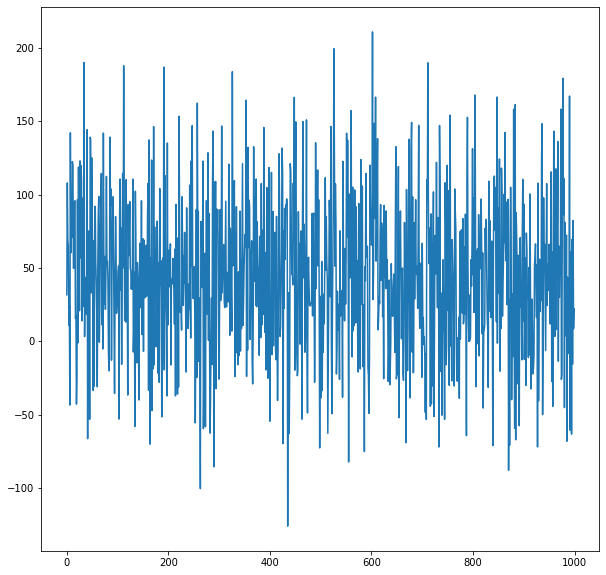

In [38]:
plt.figure(figsize = (10,10))
plt.plot(Y_train.data)
plt.show()

In [0]:
class NaiveNN:

  def __init__(self,input_units,hidden_layers,hidden_units,output_units,lr = 1e-4,epochs = 1000):
    self.input = input_units
    self.hidden_layers = hidden_layers
    self.hidden_units = hidden_units
    self.output = output_units
    
    self.wts = {}
    self.bias = {}

    for i in range(hidden_layers):
      if i == 0:
        self.wts[i] = torch.empty((input_units[1],hidden_units[i])).normal_(mean = 0.,std = 1.).requires_grad_()
        self.bias[i] = torch.tensor([1.]).requires_grad_()
        print(self.wts[i].shape,self.bias[i].shape)
      else:
        self.wts[i] = torch.empty((hidden_units[i-1],hidden_units[i])).normal_(mean = 0.,std = 1.).requires_grad_()
        self.bias[i] = torch.tensor([1.]).requires_grad_()
        print(self.wts[i].shape,self.bias[i].shape)

    self.wts[hidden_layers] = torch.empty((hidden_units[i],output_units)).normal_(mean = 0.,std = 1.).requires_grad_()
    self.bias[hidden_layers] = torch.tensor([1.]).requires_grad_()
    print(self.wts[hidden_layers].shape,self.bias[hidden_layers].shape)

    self.lr = lr
    self.epochs = epochs


  def trainNN(self,x_train,y_train):
    for e in range(self.epochs):
      self.H = {}
      for i in self.wts.keys():
        if i == 0:
          self.H[i] = torch.matmul(x_train,self.wts[i]) + self.bias[i]
        else:
          self.H[i] = torch.matmul(self.H[i-1],self.wts[i]) + self.bias[i]
      
      y_preds = self.H[self.hidden_layers]

      loss = torch.sqrt((Y_train-y_preds).pow(2).sum()/Y_train.shape[0])
      if e%10 ==0:
        print(loss)

      loss.backward()
      
      ########### Weights update
      with torch.no_grad():
        for i in self.wts.keys():
          self.wts[i].sub_(torch.tensor([self.lr])*self.wts[i].grad)
          self.bias[i].sub_(torch.tensor([self.lr])*self.bias[i].grad)

          self.wts[i].grad.zero_()
          self.bias[i].grad.zero_()
          

    return y_preds


In [93]:
input_units = [1000,12]
hidden_layers = 2
hidden_units = [5,6]
output_units = 1
nn_obj = NaiveNN(input_units,hidden_layers,hidden_units,output_units)

torch.Size([12, 5]) torch.Size([1])
torch.Size([5, 6]) torch.Size([1])
torch.Size([6, 1]) torch.Size([1])


In [94]:
y_preds = nn_obj.trainNN(X_train,Y_train)

tensor(29136.0498, grad_fn=<SqrtBackward>)
tensor(3380.5080, grad_fn=<SqrtBackward>)
tensor(2177.9988, grad_fn=<SqrtBackward>)
tensor(2086.7878, grad_fn=<SqrtBackward>)
tensor(1962.2509, grad_fn=<SqrtBackward>)
tensor(1955.0909, grad_fn=<SqrtBackward>)
tensor(1943.7187, grad_fn=<SqrtBackward>)
tensor(1917.3566, grad_fn=<SqrtBackward>)
tensor(1900.1152, grad_fn=<SqrtBackward>)
tensor(1890.0205, grad_fn=<SqrtBackward>)
tensor(1883.1122, grad_fn=<SqrtBackward>)
tensor(1877.1512, grad_fn=<SqrtBackward>)
tensor(1871.2929, grad_fn=<SqrtBackward>)
tensor(1865.8454, grad_fn=<SqrtBackward>)
tensor(1861.2634, grad_fn=<SqrtBackward>)
tensor(1857.6240, grad_fn=<SqrtBackward>)
tensor(1854.7731, grad_fn=<SqrtBackward>)
tensor(1852.5223, grad_fn=<SqrtBackward>)
tensor(1850.7200, grad_fn=<SqrtBackward>)
tensor(1849.2563, grad_fn=<SqrtBackward>)
tensor(1848.0520, grad_fn=<SqrtBackward>)
tensor(1847.0479, grad_fn=<SqrtBackward>)
tensor(1846.1988, grad_fn=<SqrtBackward>)
tensor(1845.4689, grad_fn=<SqrtBa

In [72]:
print(mat1.grad)

None


In [0]:
import torch.optim as opt

In [0]:
import pandas as pd
from sklearn.datasets import fetch_california_housing,fetch_covtype
data,target = fetch_california_housing(return_X_y=True)

In [107]:
sum(np.equal(data,None))

array([0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size = 0.2)

x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [0]:
input_units = x_train.shape[1]
output_units = 1

hidden1 = 100
hidden2 = 10

learning_rate = 0.001
epochs = 100

loss_fn = torch.nn.MSELoss()

In [0]:
model = torch.nn.Sequential(torch.nn.Linear(input_units,out_features = hidden1),
                            torch.nn.ReLU(),
                            #torch.nn.Linear(hidden1,hidden2),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hidden1,output_units))

optimizer= torch.optim.SGD(model.parameters(),lr = learning_rate,momentum = 0.01,nesterov = True) 

In [134]:
for e in range(epochs):
  y_preds = model(x_train)
  loss = loss_fn(y_preds,y_train)

  if e%100 == 0:
    print(loss)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  

  '''
  with torch.no_grad():
    for params in model.parameters():
      params = params - learning_rate*params.grad
  '''
  

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([16512])) that is different to the input size (torch.Size([16512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(3.8288, grad_fn=<MseLossBackward>)


In [136]:
clf_data,target = fetch_covtype(return_X_y=True)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(clf_data,target,test_size = 0.2)
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

input_units = x_train.shape[1]
output_units = len(np.unique(target))

hidden = 100

learning_rate = 0.001
epochs = 100


In [0]:
class NNet(nn.Module):
  def __init__(self):
    super(NNet,self).__init__()
    self.fc1 = torch.nn.Linear(input_units,hidden)
    self.fc2 = torch.nn.Linear(hidden,hidden)
    self.fc3 = torch.nn.Linear(hidden,output_units)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    x = self.fc3(x)

    return F.log_softmax(x,dim = -1)
    

In [0]:
model = NNet()
optimizer = torch.optim.Adagrad(model.parameters())
loss_nll = nn.NLLLoss()

In [159]:
for i in range(100):
  optimizer.zero_grad()
  y_preds = model.forward(x_train)
  
  loss = loss_nll(y_preds,y_train.long())
  loss.backward()

  optimizer.step()

  y_test_preds = model.forward(x_test)
  loss_test = loss_nll(y_test_preds,y_test.long())

  _,pred = y_test_preds.data.max(1)

  accuracy = pred.eq(y_test.data).sum().item()/ y_test.shape[0]
  print(accuracy)








/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.0029069767441860465
0.00290697

In [14]:
from google.colab import files
data = files.upload()

Saving names.csv to names (1).csv


In [0]:
import io
import pandas as pd
names = pd.read_csv(io.BytesIO(data['names.csv']))

In [16]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10132 entries, 0 to 10131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    10132 non-null  object
 1   Gender  10132 non-null  object
dtypes: object(2)
memory usage: 158.4+ KB


In [0]:
import random
names = names.drop_duplicates(subset = ['Name'],keep = random.choice(['first','last']))

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
names['Gender'] = le.fit_transform(names['Gender'])
names.head()

,Name,Gender
0,Aamir,1
2,Aaron,1
3,Abagael,0
4,Abagail,0
5,Abbe,0


In [0]:
import string
all_strings = string.ascii_letters + " .,;'"

In [0]:
import torch

In [0]:
def name_to_tensor(name):
  name_tensor = torch.zeros(len(name),1,len(all_strings))
  for i,c in enumerate(name):
    name_tensor[i][0][all_strings.find(c)] = 1
  
  return name_tensor

In [0]:
import torch.nn as nn
class RNN(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(RNN,self).__init__()

    self.hidden_size = hidden_size
    self.i2h = nn.Linear(input_size + hidden_size,hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size,output_size)

    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self,input,hidden):
    combine = torch.cat((input,hidden),dim = 1)
    hidden = self.i2h(combine)
    output = self.i2o(combine)
    output = self.softmax(output)
    return output,hidden

  def init_hidden(self):
    return torch.zeros(1,self.hidden_size)

In [0]:
hidden_size= 128
output_size = 2

rnn = RNN(input_size = len(all_strings),hidden_size=hidden_size,output_size=output_size)

In [0]:
iterations = 10000
learning_rate = 0.005
criterion = nn.NLLLoss()

In [0]:
def output_to_gender(output):
  top_k,top_ind = output.topk(1)
  pred_ = top_index[0].item()
  pred = names['Gender'].values[pred_]
  return pred